Head:
    sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0 

Test Accuracy: 0.9211

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

Confusion Matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  2 11]] 

CV Accuracy: mean=0.9467, std=0.0400, scores=[0.9667 0.9667 0.9    1.     0.9   ]

Query predictions: [np.str_('setosa'),

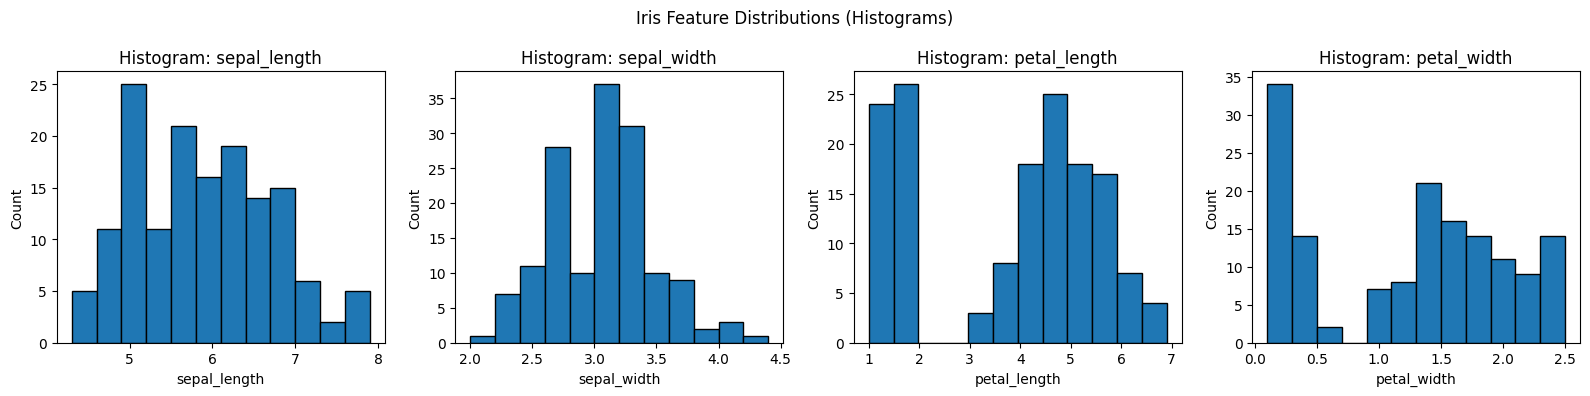

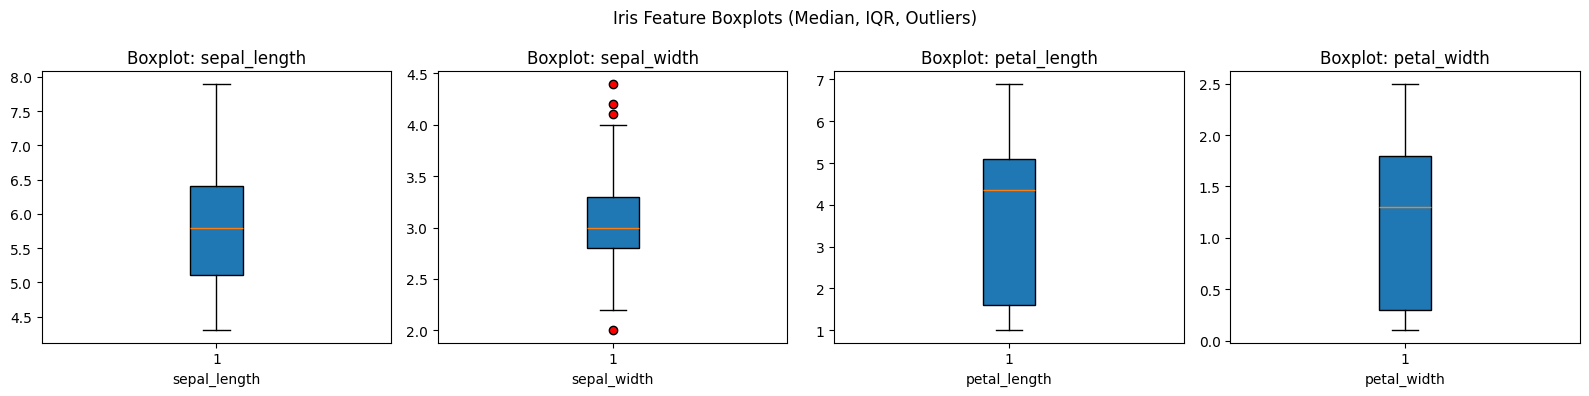

In [ ]:
# ============================
# Iris: Preprocess → GaussianNB → Metrics → Simple Viz
# ============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------
# 1) Load & tidy
# --------------------------
iris = load_iris(as_frame=True)
df = iris.frame.rename(columns={
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)" : "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)" : "petal_width",
})
X = df.drop(columns=["target"]).to_numpy()
y = df["target"].to_numpy()
class_names = iris.target_names  # ['setosa','versicolor','virginica']

print("Head:\n", df.head(), "\n")

# --------------------------
# 2) Preprocessing (scaling for consistency)
# --------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------
# 3) Train / Test split
# --------------------------
X_tr, X_te, y_tr, y_te = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# --------------------------
# 4) Bayesian model: Gaussian Naive Bayes
# --------------------------
gnb = GaussianNB()
gnb.fit(X_tr, y_tr)

# --------------------------
# 5) Evaluate on test
# --------------------------
y_pred = gnb.predict(X_te)
y_proba = gnb.predict_proba(X_te)

acc = accuracy_score(y_te, y_pred)
print(f"Test Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_te, y_pred, target_names=class_names))

cm = confusion_matrix(y_te, y_pred)
print("Confusion Matrix:\n", cm, "\n")

# --------------------------
# 6) Cross-validation (optional but useful)
# --------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gnb, X_scaled, y, cv=cv, scoring="accuracy")
print(f"CV Accuracy: mean={cv_scores.mean():.4f}, std={cv_scores.std():.4f}, scores={np.round(cv_scores,4)}\n")

# --------------------------
# 7) Query dataset (to test model output)
# --------------------------
x_query = np.array([
    [5.1, 3.5, 1.4, 0.2],  # setosa-like
    [6.0, 2.2, 4.0, 1.0],  # versicolor-like
    [6.5, 3.0, 5.2, 2.0],  # virginica-like
    [5.7, 2.8, 4.1, 1.3],  # versicolor-like
    [6.3, 3.3, 6.0, 2.5],  # virginica-like
])
x_query_scaled = scaler.transform(x_query)
query_pred_idx = gnb.predict(x_query_scaled)
query_pred = [class_names[i] for i in query_pred_idx]
query_proba = gnb.predict_proba(x_query_scaled)

print("Query predictions:", query_pred)
print("Query probabilities:\n", np.round(query_proba, 3), "\n")

# --------------------------
# 8) Simple Visualization (no decision plots)
#    (A) Histograms per feature
# --------------------------
feat_cols = ["sepal_length","sepal_width","petal_length","petal_width"]
fig, axes = plt.subplots(1, 4, figsize=(16,4))
for i, col in enumerate(feat_cols):
    axes[i].hist(df[col], bins=12, edgecolor="black")
    axes[i].set_title(f"Histogram: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
fig.suptitle("Iris Feature Distributions (Histograms)")
plt.tight_layout()
plt.show()

# --------------------------
# 8) (B) Boxplots per feature
# --------------------------
fig, axes = plt.subplots(1, 4, figsize=(16,4))
for i, col in enumerate(feat_cols):
    axes[i].boxplot(df[col], vert=True, patch_artist=True,
                    flierprops=dict(marker='o', markerfacecolor='red'))
    axes[i].set_title(f"Boxplot: {col}")
    axes[i].set_xlabel(col)
plt.suptitle("Iris Feature Boxplots (Median, IQR, Outliers)")
plt.tight_layout()
plt.show()
